# PSP SPAN-electron VDF Walkthrough

This walkthrough will step through the basics of downloading a cdf file, looking at the various variables, and plotting the SPAN-electron velocity distribution function in several ways.

CDF library version 3.8 can be downloaded here:
https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/cdf38_0/
(suggest you use the InstallMate installer to automatically set paths)

Instructions (extremely detailed) on CDF can be found here:
https://spdf.gsfc.nasa.gov/pub/software/cdf/doc/cdf380/cdf380ug.pdf

The CDF format allows for a more flexible storage of data variables that may or may not have different lengths. For example, if you had temperature measurements at various points in space recorded at certain times, a standard way to store this information in an ascii table would be like so:
    <img src="basicDataTable.jpg">
As you can see, this relies on repeated measurement values to properly show each unique combination taking up a record number. A cdf file uses pointers within the file connecting higher-dimension arrays (zVariables) to each other and to each record number:
    <img src="cdfDataTable.jpg">
This allows us to be much more flexible with the way we concatenate data as well as cuts down on storage space. It also is necessary in order to coherently store higher-order arrays. We are going to look at a 3-dimensional array variable containing electron energy and pitch angle data measured by the Parker Solar Probe in this tutorial.

Import the cdf reader from spacepy (the library able to read the data encoded in the cdf format) and wget (which I will use here to grab and download the file from the remote server).


In [2]:
from spacepy import pycdf 
import spacepy.plot as splot
import wget
import numpy as np

from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)


Next we define the location of the file we will pull. For this first instance I explicitly pull a single file. You will notice there is an if-loop in there to check to see if the file is already in this directory. If it finds the file already here, it will skip the download. You could very easily point this query at a local cache folder where you plan to store data rather then the folder you are running this notebook from.

In [3]:
#PAfile_directory = 'G:\My Drive\Research\Data\AutoplotCache\http\w3sweap.cfa.harvard.edu\pub\data\sci\sweap\spe\L3\spe_sf0_pad\2020\05'
PAfile_directoryRemote = 'http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/'
PAfile_filename = 'psp_swp_spe_sf0_L3_pad_20200920_v02.cdf'

import os.path

if os.path.isfile(PAfile_filename):
    print (f"File already exists in local directory - [{PAfile_filename}]")
    PAfile = PAfile_filename
else:
    print ("File doesn't exist, downloading...")
    PAfile = wget.download(PAfile_directoryRemote + PAfile_filename)


#cdf_PAfile = pycdf.CDF(PAfile)

#print(cdf_PAfile)

File doesn't exist, downloading...
100% [........................................................................] 42505130 / 42505130

I could use string formatting to be a little more flexible in what I download (and not have to change the code in multiple places). I am only looking at a single file, but we could recursively grab multiple files either by looping through lists of dates or just by downloading everything in a remote folder by using '*'. In the for-loop below, I am taking advantage of python's "f-strings" to place variables from defined lists into the filename.

In [4]:
year  = '2020'
month = '09'
day   = '20'

PAfile_directoryRemote = f'http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/{year}/{month}/'
PAfile_filename = f'psp_swp_spe_sf0_L3_pad_{year}{month}{day}_v02.cdf'

if os.path.isfile(PAfile_filename):
    print ("File exists already")
    PAfile = PAfile_filename
else:
    print ("File doesn't exist, downloading")
    PAfile = wget.download(PAfile_directoryRemote + PAfile_filename)

# Now for multiple files from that month
years = ['2020']
months = ['09']
days = ['18','19','20','21','22','23','24']

for year in years:
    for month in months:
        for day in days:
            PAfile_directoryRemote = f'http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/{year}/{month}/'
            PAfile_filename = f'psp_swp_spe_sf0_L3_pad_{year}{month}{day}_v02.cdf'
            
            # Instead of downloading the files unnecessarily and taking forever, I'll just print out the names here:
            print()
            print(PAfile_directoryRemote + PAfile_filename)


File exists already

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200918_v02.cdf

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200919_v02.cdf

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200920_v02.cdf

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200921_v02.cdf

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200922_v02.cdf

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200923_v02.cdf

http://w3sweap.cfa.harvard.edu/pub/data/sci/sweap/spe/L3/spe_sf0_pad/2020/09/psp_swp_spe_sf0_L3_pad_20200924_v02.cdf


What is actually in this file? This is a Common Data Format (CDF) file, a format that has been championed by NASA recently. It is very common for more recent data recorded by in situ measurements as well as reprocessed data from older missions. We can take a look inside the file using the print() command.

In [5]:
cdf_PAfile = pycdf.CDF(PAfile)

print(cdf_PAfile)

ARCH_BITS: CDF_UINT1 [12360]
EFLUX_VS_ENERGY: CDF_FLOAT [12360, 32]
EFLUX_VS_PA_E: CDF_FLOAT [12360, 12, 32]
ENERGY_VALS: CDF_FLOAT [12360, 32]
Epoch: CDF_TIME_TT2000 [12360]
F0: CDF_UINT2 [12360]
GAP: CDF_INT2 [12360]
LTCSNNNN_BITS: CDF_UINT1 [12360]
MAGF_SC: CDF_FLOAT [12360, 3]
MET: CDF_DOUBLE [12360]
MODE2: CDF_UINT2 [12360]
NSAMPLE_VS_PA_E: CDF_INT2 [12360, 12, 32]
NUM_ACCUM: CDF_UINT4 [12360]
PITCHANGLE: CDF_FLOAT [12360, 12]
PRODUCT_BITS: CDF_UINT1 [12360]
QUALITY_FLAG: CDF_UINT1 [12360]
SMP_BITS: CDF_INT2 [12360]
SPX_VS_PA_E: CDF_INT2 [12360, 12, 32]
STATUS_BITS: CDF_UINT1 [12360]
TIME: CDF_DOUBLE [12360]
TOT_ACCUM_PERIOD: CDF_UINT4 [12360]
VALID: CDF_INT2 [12360]


There are many different variables in here, and the beauty of a cdf is that they point at each other for dependencies. Each of these variables is an array, although some of them are made up of supporting information and some are the real science data. The numbers in the brackets indicate how many elements are in each dimension of each array.

We have some arrays that are 1-dimensional (rank1), like 'Epoch'. Epoch is the list of timestamps that are assigned to each record number. Others, like 'MAGF_SC' are two-dimensional (rank2). MAGF_SC is the magnetic field measurement at the spacecraft that went into the data processing for this file. The '12360' length refers to the number of records, and lines up with each timestamp. The '3' length refers to the 3 components of the magnetic field, so that at each point in time we are recording Bx, By, and Bz.

We can print out all of the attributes of the magnetic field and then explicitly pull apart pieces of this array like so:

In [6]:
magf_sc = cdf_PAfile['MAGF_SC']
print(magf_sc.attrs)

Bx_sc = magf_sc[:,0]
By_sc = magf_sc[:,1]
Bz_sc = magf_sc[:,2]

print()
print('List of all By_sc values:',By_sc)

CATDESC: Magnetic Field in Spacecraft Coordinates [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic Field [CDF_CHAR]
FILLVAL: nan [CDF_FLOAT]
FORMAT: E12.4 [CDF_CHAR]
LABLAXIS: Bx;By;Bz [CDF_CHAR]
SCALETYP: linear [CDF_CHAR]
UNITS: nT [CDF_CHAR]
VALIDMAX: 10000.0 [CDF_FLOAT]
VALIDMIN: -10000.0 [CDF_FLOAT]
VAR_NOTES: In spacecraft frame [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]

List of all By_sc values: [2.1491587 2.2804132 1.7631732 ... 3.4492512 3.9320061 3.5556784]


For this tutorial, we are going to look at the 'EFLUX_VS_PA_E' variable, which is a 3-dimensional array of electron flux measurements that depends on time, pitch angle, and energy.

In [7]:


eflux_vs_pitchAngle_vs_E = cdf_PAfile['EFLUX_VS_PA_E']
epoch = cdf_PAfile['Epoch']
energy_vals = cdf_PAfile['ENERGY_VALS']
pitchAngle = cdf_PAfile['PITCHANGLE']

print(eflux_vs_pitchAngle_vs_E.attrs)
print()
print('shape of array:',eflux_vs_pitchAngle_vs_E.shape)
#print(eflux_vs_energy[:,:,8][...])

CATDESC: Differential Energy Flux vs Pitch-angle and Energy [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DEPEND_1: PITCHANGLE [CDF_CHAR]
DEPEND_2: ENERGY_VALS [CDF_CHAR]
DISPLAY_TYPE: spectrogram [CDF_CHAR]
FIELDNAM: Eflux vs Pitch-angle and Energy [CDF_CHAR]
FILLVAL: nan [CDF_FLOAT]
FORMAT: E12.4 [CDF_CHAR]
LABLAXIS: Eflux vs PA-E [CDF_CHAR]
SCALETYP: log [CDF_CHAR]
UNITS: eV/cm2-s-ster-eV [CDF_CHAR]
VALIDMAX: 1000000000000.0 [CDF_FLOAT]
VALIDMIN: 0.001 [CDF_FLOAT]
VAR_TYPE: data [CDF_CHAR]

shape of array: (12360, 12, 32)


We can think of the array as if it were a 3-dimensional grid of points, where each point corresponds to a value in units of eV/cm2-s-ster-eV.
<img src="three-dimensional-grid_labels.jpg">

If we want to look at a particular aspect of this array, say how the electrons at some energy and within a specific pitch angle range looked as a function of time, we would choose this subsection of points:
<img src="three-dimensional-grid_labels_tall-e2-pa0.jpg">
Here we have chosen the values of eflux at the 2nd pitch angle bin and the 0th energy bin. We can see what those bins are by looking at the DEPEND_1 and DEPEND_2 variables.

In [8]:
print('The 2nd pitch angle bin is centered at:', cdf_PAfile['PITCHANGLE'][0,2], cdf_PAfile['PITCHANGLE'].attrs['UNITS'])
print('The 0th energy bin is centered at:', cdf_PAfile['ENERGY_VALS'][0,0], cdf_PAfile['ENERGY_VALS'].attrs['UNITS'])

The 2nd pitch angle bin is centered at: 37.5 Degrees
The 0th energy bin is centered at: 1793.9454345703125 eV


We now have a 1-dimensional array of electron fluxes at 1800 eV with a pitch angle of 37 degrees that varies in time. We can look at a subset in time of this data set by manually picking lower and upper bounds of indices and only plotting those values. Note we of course will need to take subsets of both the x- and y-axes (time and flux) or else we will be plotting two arrays of different lengths against each other. 

Text(0.5, 0, '2020-09-20')

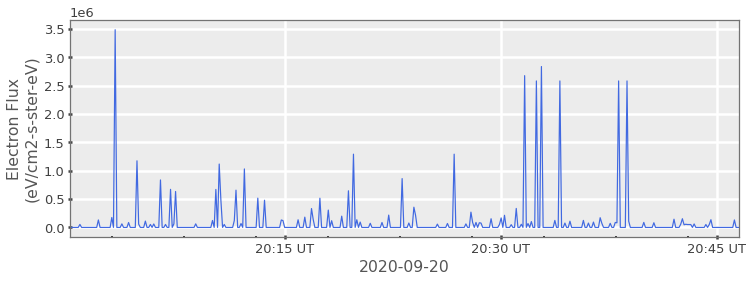

In [9]:

startIndex = 10300
stopIndex  = 10700
epoch[startIndex:stopIndex]

pitchAngleUnits = pitchAngle.attrs['UNITS']
fluxUnits = eflux_vs_pitchAngle_vs_E.attrs['UNITS']
energyUnits = energy_vals.attrs['UNITS']


fig, ax = splot.plt.subplots()
fig.set_size_inches(12,4)
ax.plot(epoch[startIndex:stopIndex], eflux_vs_pitchAngle_vs_E[startIndex:stopIndex,2,0], '-')

splot.applySmartTimeTicks(ax, epoch[startIndex:stopIndex], dolimit=True, dolabel=False)
ax.set_ylabel(f'Electron Flux\n({fluxUnits})')
ax.set_xlabel(f'{epoch[startIndex]}'[0:10])




However, we can also use datetime and the bisect function to find a similar subset using more human-readable values. We first define the start and stop times as datetime variables, then use the bisect function to find where in the number of records each datetime variable most closely intersects the epoch values.

start of time period: 2020-09-20 20:00:00
end of time period: 2020-09-20 20:40:00
startIndex: 10300
stopIndex: 10643


Text(0.5, 0, '2020-09-20')

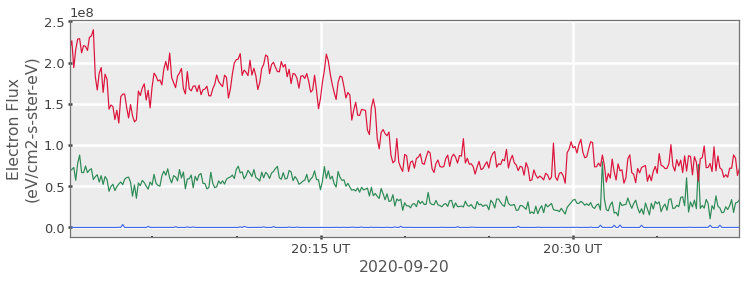

In [10]:
import datetime
# datetime(YYYY, mm, dd, HH, MM)
start = datetime.datetime(2020, 9, 20, 20, 0)
stop  = datetime.datetime(2020, 9, 20, 20, 40)
print('start of time period:',start)
print('end of time period:',stop)
import bisect
startIndex = bisect.bisect_left(epoch, start)
stopIndex  = bisect.bisect_left(epoch, stop)
print('startIndex:',startIndex)
print('stopIndex:',stopIndex)


fig, ax = splot.plt.subplots()
fig.set_size_inches(12,4)
ax.plot(epoch[startIndex:stopIndex], eflux_vs_pitchAngle_vs_E[startIndex:stopIndex,2,0], '-')
ax.plot(epoch[startIndex:stopIndex], eflux_vs_pitchAngle_vs_E[startIndex:stopIndex,2,8], '-')
ax.plot(epoch[startIndex:stopIndex], eflux_vs_pitchAngle_vs_E[startIndex:stopIndex,2,10], '-')

splot.applySmartTimeTicks(ax, epoch[startIndex:stopIndex], dolimit=True, dolabel=False)
ax.set_ylabel(f'Electron Flux\n({fluxUnits})')
ax.set_xlabel(f'{epoch[startIndex]}'[0:10])



Now, instead of the single pitch angle (37 degrees) we chose above, we could look at this data array for this one energy bin over all pitch angles as a function of time. In our cartoon, instead of points just in one row, we will select all of the rows at that energy:
<img src="three-dimensional-grid_labels_tall-eall-pa0.jpg">

Plotting many different lines on the same panel would get busy and confusing, so we can find a way to stack all of the lines in order and use color to show the data. Instead of showing the increase and decrease in flux as vertical variations in a line, we can compress each pitch angle value into a row and show the variations with changes in color.


(12360, 12)
7.5 172.5


C:\Users\kpaulson\AppData\Local\Programs\Python\Python39\lib\site-packages\spacepy\plot\spectrogram.py:659: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(X, Y_tmp[ind][0], Z_tmp.T,


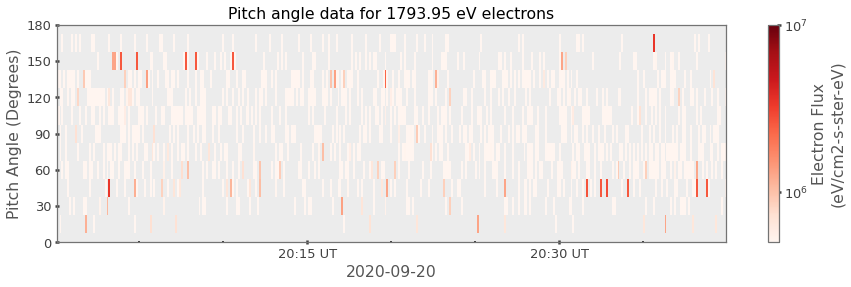

In [11]:

energyIndex = 0

eflux_vs_pitchAngle_vs_E_highE = eflux_vs_pitchAngle_vs_E[:,:,energyIndex]
print(eflux_vs_pitchAngle_vs_E_highE.shape)

spec = splot.simpleSpectrogram(epoch[startIndex:stopIndex], pitchAngle[startIndex:stopIndex], eflux_vs_pitchAngle_vs_E_highE[startIndex:stopIndex], shading='nearest', vmin=5E5, vmax=1E7, cmap='Reds', cbtitle=f'Electron Flux\n({fluxUnits})')

spec.set_title(f'Pitch angle data for {np.round(energy_vals[0,energyIndex],2)} eV electrons')
spec.set_yscale('linear')
spec.set_ylabel(f'Pitch Angle ({pitchAngleUnits})')
spec.set_yticks([0,30,60,90,120,150,180])
spec.set_xlabel(f'{epoch[startIndex]}'[0:10])

splot.applySmartTimeTicks(spec, epoch[startIndex:stopIndex], dolimit=True, dolabel=False)
fig, ax = splot.set_target(target=spec)
fig.set_size_inches(15,4)

In the colored plot, the third row from the bottom ('2' counting from zero) is the same representation as the line plot above. At this energy however, there is not much to see. There just aren't high enough fluxes of 1800 eV electrons to see anything more than noise. In the solar wind, we would expect to see the electron strahl component stretching out between 100-400 eV, so we can try to make the same plot with a different energy value. In our cartoon, we would step to a different frame of the array, still looking at the entirety of pitch angle and time values:
<img src="three-dimensional-grid_labels_tall-eall-pa1.jpg">

In the cartoon we just slide back from '0' to '1', but to show you some real data I will choose energy index '8' which corresponds to an energy of 315 eV:

7.5 172.5


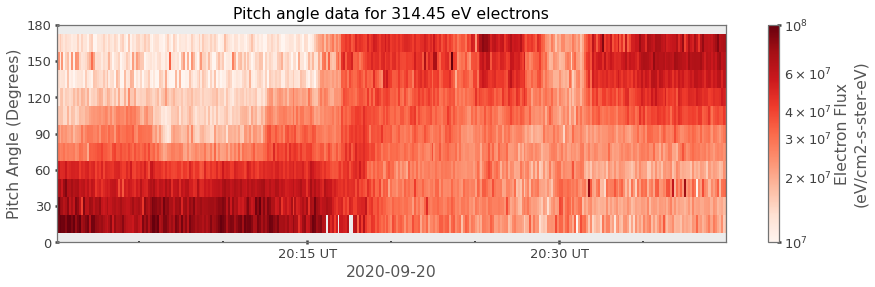

In [12]:

energyIndex = 8

eflux_vs_pitchAngle_vs_E_strahl = eflux_vs_pitchAngle_vs_E[:,:,energyIndex]
pitchAngleUnits = pitchAngle.attrs['UNITS']
fluxUnits = eflux_vs_pitchAngle_vs_E.attrs['UNITS']


spec = splot.simpleSpectrogram(epoch[startIndex:stopIndex], pitchAngle[startIndex:stopIndex], eflux_vs_pitchAngle_vs_E_strahl[startIndex:stopIndex], shading='nearest', vmin=1E7, vmax=1E8, cmap='Reds', cbtitle=f'Electron Flux\n({fluxUnits})')

spec.set_title(f'Pitch angle data for {np.round(energy_vals[0,energyIndex],2)} eV electrons')
spec.set_yscale('linear')
spec.set_ylabel(f'Pitch Angle ({pitchAngleUnits})')
spec.set_yticks([0,30,60,90,120,150,180])
spec.set_xlabel(f'{epoch[startIndex]}'[0:10])

splot.applySmartTimeTicks(spec, epoch[startIndex:stopIndex], dolimit=True, dolabel=False)
fig, ax = splot.set_target(target=spec)
fig.set_size_inches(15,4)

We can clearly see that there is high flux at pitch angles near 0 degrees in the beginning of the plot, and then the high flux shifts up to 180 degrees. This is the signature of a current sheet crossing in the solar wind, where the magnetic field from the Sun has switched directions from the spacecraft point of view, but the electrons are still streaming away from the sun along those field lines.

What if we wanted to look at a particular slice of time? Instead of looking at variations in time, we can take a slice of the data at some time and look at how the flux is distributed in both pitch angle and energy. In our cartoon, we would look at the all the points corresponding to a segment of the x-axis:
<img src="three-dimensional-grid_labels_t3-eall-paall.jpg">

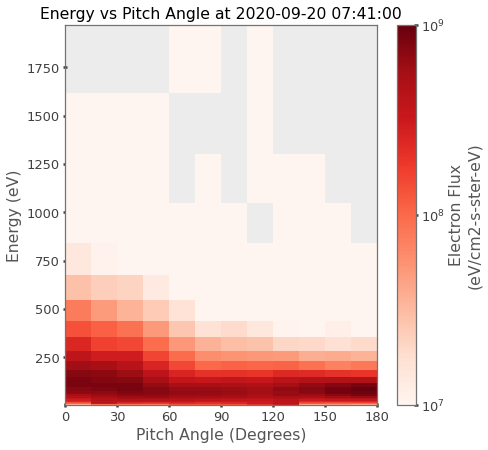

In [13]:
timeSlice = datetime.datetime(2020, 9, 20, 7, 41)
timeSliceIndex = bisect.bisect_left(epoch, timeSlice)

energyUnits = energy_vals.attrs['UNITS']

eflux_vs_pitchAngle_vs_E_timeSlice = eflux_vs_pitchAngle_vs_E[timeSliceIndex,:,:]


spec = splot.simpleSpectrogram( pitchAngle[timeSliceIndex,:], energy_vals[timeSliceIndex,:], eflux_vs_pitchAngle_vs_E_timeSlice, shading='nearest', vmin=1E7, vmax=1E9, cmap='Reds', cbtitle=f'Electron Flux\n({fluxUnits})')

spec.set_title(f'Energy vs Pitch Angle at {timeSlice}')
spec.set_yscale('linear')
spec.set_xlabel(f'Pitch Angle ({pitchAngleUnits})')
spec.set_ylabel(f'Energy ({energyUnits})')
spec.set_xticks([0,30,60,90,120,150,180])

fig, ax = splot.set_target(target=spec)
fig.set_size_inches(7,7)

Finally, since this is a pitch angle plot we should put everything into a polar orientation. Below we can see that the electron fluxes show a core population in the energy range from 0eV to 200eV that is seen in all directions, and a strahl population >200eV that is centered around 0 degrees.

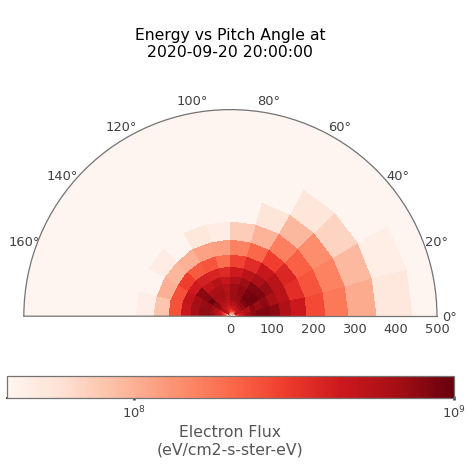

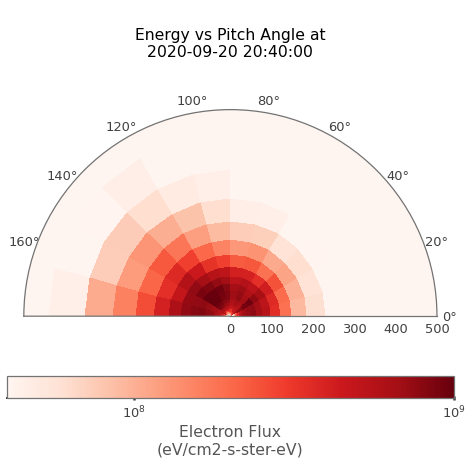

In [14]:

# First look at a time period prior to the current sheet crossing
#timeSlice = datetime.datetime(2020, 9, 20, 7, 47)
timeSlice = datetime.datetime(2020, 9, 20, 20, 0)
timeSliceIndex = bisect.bisect_left(epoch, timeSlice)

import matplotlib.colors as colors

eflux_vs_pitchAngle_vs_E_timeSlice = eflux_vs_pitchAngle_vs_E[timeSliceIndex,:,:]

r, theta = np.meshgrid( energy_vals[timeSliceIndex,:], pitchAngle[timeSliceIndex,:]*3.14159/180 )
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.set_ylim(0,500)
ax.set_xlim(0,3.14159)
ax.set_title(f'Energy vs Pitch Angle at\n{timeSlice}', pad=-50)
#c = ax.scatter(theta, r, c=eflux_vs_pitchAngle_vs_E_timeSlice, cmap='Reds')#, alpha=0.75)
c = ax.pcolormesh(theta, r, eflux_vs_pitchAngle_vs_E_timeSlice, cmap='Reds', shading='nearest', norm=colors.LogNorm(vmin=4E7, vmax=1E9))
fig.set_size_inches(8,8)
cbar = fig.colorbar(c, orientation="horizontal", pad=-0.1)
cbar.set_label(f'Electron Flux\n({fluxUnits})')

####
# Now look at a time period just after the current sheet crossing
timeSlice = datetime.datetime(2020, 9, 20, 20, 40)
timeSliceIndex = bisect.bisect_left(epoch, timeSlice)

eflux_vs_pitchAngle_vs_E_timeSlice = eflux_vs_pitchAngle_vs_E[timeSliceIndex,:,:]

r, theta = np.meshgrid( energy_vals[timeSliceIndex,:], pitchAngle[timeSliceIndex,:]*3.14159/180 )
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.set_ylim(0,500)
ax.set_xlim(0,3.14159)
ax.set_title(f'Energy vs Pitch Angle at\n{timeSlice}', pad=-50)
#c = ax.scatter(theta, r, c=eflux_vs_pitchAngle_vs_E_timeSlice, cmap='Reds')#, alpha=0.75)
c = ax.pcolormesh(theta, r, eflux_vs_pitchAngle_vs_E_timeSlice, cmap='Reds', shading='nearest', norm=colors.LogNorm(vmin=4E7, vmax=1E9))
fig.set_size_inches(8,8)
cbar = fig.colorbar(c, orientation="horizontal", pad=-0.1)
cbar.set_label(f'Electron Flux\n({fluxUnits})')